# TFE4940 Questionnaires Data Analysis 📊❓💻

This notebook 📒 is a part of Peter Remøy Paulsens🙋‍♂️ master thesis, TFE4940.

Here you can see the code used for the resulting subjective analysis part, used in the final project report 📚📖

The participants of this experiment filled out a questionnaire where they saw 12 different videos processed by a machine learning based foreground extractor. They were asked to some questions for each video used to collect data on the quality of their experience.
* How satisfied are you with the quality of the silhouette extraction?
* Did you notice any artefacts with the silhouette extraction?
* Do you think the artefacts were annoying?

---
We are going to utilize a CSV file export from this questionnaire. We are going to have to place this file in this directory each time we want to create a new runtime of this notebook. Upload it if it isn't in the directory.

Lets check if the files are placed in our directory



In [ ]:
import os

print(os.getcwd())      # Tells us which directory we are in
print(os.listdir())     # Lists all of the contents in our directory

/content
['.config', '30nov2021_final.csv', 'average_objective_stats.csv', 'sample_data']


You should see something like this printed out:
```
['.config', 'questionnaire.csv', 'sampledata']
```
---
## Analyzing Tool 🕵️‍♀️🐼🔎
### Importing Data 🤏
We will use [pandas](https://pandas.pydata.org) as our analyzing tool. We import this and name it **pd**.

In [ ]:
import pandas as pd

From here we make a panda DataFrame which reads our csv file.

We read the csv file and checks if it outputs the correct data

In [ ]:
df = pd.read_csv('30nov2021_final.csv')
df.head()

,Tidsmerke,Have you signed the consent form?,How old are you?,Gender,Education,"What is your occupation? If you are a student, please state the category most fitting to your study. Don't answer if you're not working.",How satisfied are you with the quality of the silhouette extraction?,Did you notice any artefacts with the silhouette extraction?,Do you think the artefacts were annoying?,How satisfied are you with the quality of the silhouette extraction?.1,Did you notice any artefacts with the silhouette extraction?.1,Do you think the artefacts were annoying?.1,How satisfied are you with the quality of the silhouette extraction?.2,Did you notice any artefacts with the silhouette extraction?.2,Do you think the artefacts were annoying?.2,How satisfied are you with the quality of the silhouette extraction?.3,Did you notice any artefacts with the silhouette extraction?.3,Do you think the artefacts were annoying?.3,How satisfied are you with the quality of the silhouette extraction?.4,Did you notice any artefacts with the silhouette extraction?.4,Do you think the artefacts were annoying?.4,How satisfied are you with the quality of the silhouette extraction?.5,Did you notice any artefacts with the silhouette extraction?.5,Do you think the artefacts were annoying?.5,How satisfied are you with the quality of the silhouette extraction?.6,Did you notice any artefacts with the silhouette extraction?.6,Do you think the artefacts were annoying?.6,How satisfied are you with the quality of the silhouette extraction?.7,Did you notice any artefacts with the silhouette extraction?.7,Do you think the artefacts were annoying?.7,How satisfied are you with the quality of the silhouette extraction?.8,Did you notice any artefacts with the silhouette extraction?.8,Do you think the artefacts were annoying?.8,How satisfied are you with the quality of the silhouette extraction?.9,Did you notice any artefacts with the silhouette extraction?.9,Do you think the artefacts were annoying?.9,How satisfied are you with the quality of the silhouette extraction?.10,Did you notice any artefacts with the silhouette extraction?.10,Do you think the artefacts were annoying?.10,How satisfied are you with the quality of the silhouette extraction?.11,Did you notice any artefacts with the silhouette extraction?.11,Do you think the artefacts were annoying?.11,Do you have any additional feedback on the contents of the videos? What is your general impression? Any feedback is welcome. Du kan skrive på norsk om du vil.
0,2021/11/15 11:15:03 a.m. CET,Yes,35 - 44,Male,Higher than master's degree,IT and computers,Slightly satisfied,Very noticable,Very annoying,Very satisfied,Slightly noticable,Slightly annoying,Very satisfied,Slightly noticable,Slightly annoying,Moderately satisfied,Very noticable,Moderately annoying,Very satisfied,Not at all noticable,Not at all annoying,Slightly satisfied,Very noticable,Very annoying,Moderately satisfied,Very noticable,Very annoying,Very satisfied,Slightly noticable,Not at all annoying,Moderately satisfied,Moderately noticable,Moderately annoying,Moderately satisfied,Very noticable,Moderately annoying,Moderately satisfied,Very noticable,Very annoying,Moderately satisfied,Very noticable,Moderately annoying,The examples are good
1,2021/11/15 4:42:21 p.m. CET,Yes,25 - 34,Male,Master's degree,Electronics,Slightly satisfied,Extremely noticable,Very annoying,Moderately satisfied,Very noticable,Moderately annoying,Slightly satisfied,Extremely noticable,Very annoying,Not at all satisfied,Extremely noticable,Extremely annoying,Very satisfied,Slightly noticable,Slightly annoying,Not at all satisfied,Extremely noticable,Extremely annoying,Not at all satisfied,Extremely noticable,Extremely annoying,Very satisfied,Slightly noticable,Slightly annoying,Slightly satisfied,Very noticable,Very annoying,Slightly satisfied,Extremely noticable,Very annoying,Slightly satisfied,Extremely noticable,Very annoying,Slightly satisfied,Extremely noticable,Very annoying,NaN


### Demographic (pre-testing) 💁‍♂️👵🌍👧🙋‍♀️
Lets see the demographic of the participants in the experimentation.

##### Distribution of Age

Here we will count the number of participants of different age ranges. 
By default, pandas sort by the highest number, but we want the ages to be shown from lowest age to highest age. That's why we are reindexing the age.

In [ ]:
age = df['How old are you?'].value_counts()

age_sorted = age.reindex(['Under 18', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', 'Older than 65'])

print(age_sorted)

Under 18          1
18 - 24          17
25 - 34          17
35 - 44           3
45 - 54           6
55 - 64           9
Older than 65     1
Name: How old are you?, dtype: int64


We want the plot axis to be less crowded. That's why we rename some of the indices to shorten them

In [ ]:

age_sorted = age_sorted.rename(index={'Under 18': '<18'}) 
age_sorted = age_sorted.rename(index={'Older than 65': '>65'}) 

print(age_sorted)

<18         1
18 - 24    17
25 - 34    17
35 - 44     3
45 - 54     6
55 - 64     9
>65         1
Name: How old are you?, dtype: int64


Now we can plot the ages

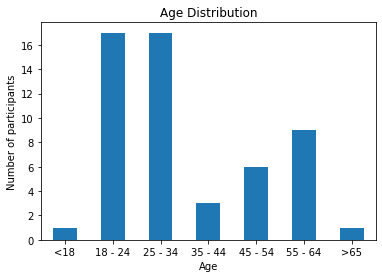

In [ ]:
age_plot = age_sorted.plot(kind="bar", title="Age Distribution", ylabel="Number of participants", xlabel="Age", rot=0)


And save the figure

In [ ]:
age_plot.figure.savefig('age_plot.pdf')

##### Distribution of gender

In [ ]:
gender = df['Gender'].value_counts()

print(gender)



Male      29
Female    25
Name: Gender, dtype: int64


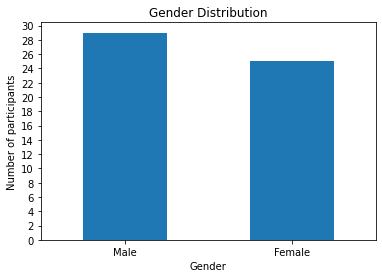

In [ ]:
gender_plot = gender.plot(kind="bar", title="Gender Distribution", ylabel="Number of participants", xlabel="Gender", rot=0, x="Gender", y="Number of participants")
gender_plot.locator_params(nbins=20, axis='y')

In [ ]:
gender_plot.figure.savefig('gender_plot.pdf')

##### Distribution of education and work

In [ ]:
education = df['Education'].value_counts()

print(education)

Master's degree                     19
Bachelor's degree                   17
Some higher education, no degree    10
High school or equivalent            4
Two year-degree                      2
Higher than master's degree          1
Primary school                       1
Name: Education, dtype: int64


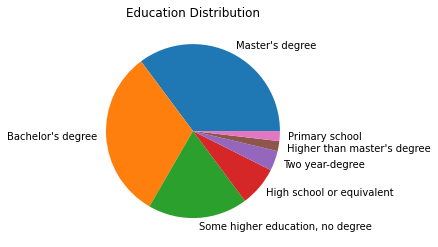

In [ ]:
education_plot = education.plot(kind="pie", title="Education Distribution", ylabel="")

education_plot.figure.savefig('education.pdf')

In [ ]:
occupation = df["What is your occupation? If you are a student, please state the category most fitting to your study. Don't answer if you're not working."].value_counts()

print(occupation)

Electronics                  10
IT and computers              7
Health                        6
Pedagogy                      4
Oil, gass and energy          4
Children                      2
Technology                    2
Shipping                      2
Industry                      2
Economics                     2
Sales and service             2
Design                        2
History                       1
Climate and environment       1
Aviation                      1
People                        1
Fishing and aquaculture       1
Construction                  1
Office and administration     1
Science                       1
Name: What is your occupation? If you are a student, please state the category most fitting to your study. Don't answer if you're not working., dtype: int64


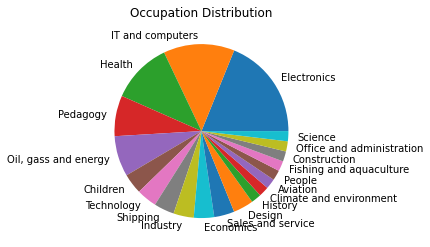

In [ ]:
occupation_plot = occupation.plot(kind="pie", title="Occupation Distribution", ylabel="", xlabel="")
#autopct='%1.1f%%' if you want to add percentage to the pie chart, add this to the plot()

occupation_plot.figure.savefig('occupations.pdf')


## Video rating 🧐🤯🤔

Lets now take a look on the questionnaire answers for the rating of the videos.

#### Making answers numerical 🔢
A small problem with the original answers, is that the answers has text answers. This was to make it easier for the participants to answer the questionnaire. But, to make it easier to analyze the , we'll have to convert the data to numerical values

| Number | Question 1           | Question 2           | Question 3          |
|--------|----------------------|----------------------|---------------------|
| 1      | Completely satisfied | Extremely noticeable | Extremely annoying  |
| 2      | Very satisfied       | Very noticeable      | Very annoying       |
| 3      | Moderately satisfied | Moderately noticeable| Moderately annoying |
| 4      | Slightly satisfied   | Slightly noticeable  | Slightly annoying   |
| 5      | Not at all satisfied | Not at all noticeable| Not at all annoying |


We will export this to a new CSV file with numerical values, to not ruin the original CSV file

In [ ]:
# Converting the text answers from Question 1 to numbers
df.replace(to_replace="Completely satisfied", value=5, inplace=True)
df.replace(to_replace="Very satisfied", value=4, inplace=True)
df.replace(to_replace="Moderately satisfied", value=3, inplace=True)
df.replace(to_replace="Slightly satisfied", value=2, inplace=True)
df.replace(to_replace="Not at all satisfied", value=1, inplace=True)

# Converting the text answers from Question 2 to numbers
# BTW the questionnaire has a writing error in it. Noticeable have been written noticable
df.replace(to_replace="Extremely noticable", value=5, inplace=True)
df.replace(to_replace="Very noticable", value=4, inplace=True)
df.replace(to_replace="Moderately noticable", value=3, inplace=True)
df.replace(to_replace="Slightly noticable", value=2, inplace=True)
df.replace(to_replace="Not at all noticable", value=1, inplace=True)

# Converting the text answers from Question 3 to numbers
# BTW the questionnaire has a writing error in it. Noticeable have been written noticable
df.replace(to_replace="Extremely annoying", value=5, inplace=True)
df.replace(to_replace="Very annoying", value=4, inplace=True)
df.replace(to_replace="Moderately annoying", value=3, inplace=True)
df.replace(to_replace="Slightly annoying", value=2, inplace=True)
df.replace(to_replace="Not at all annoying", value=1, inplace=True)


# Exporting to a new numerical csv file
df.to_csv('questionnaire_numerical.csv', index=False)

Let's make a new DataFrame with the numerical CSV sheet

In [ ]:
df_num = pd.read_csv('questionnaire_numerical.csv')

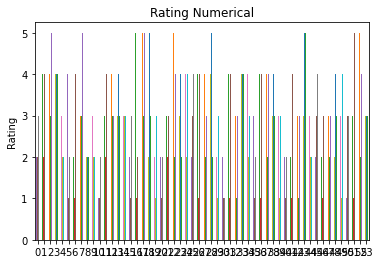

In [ ]:
df_num.plot(kind="bar", title="Rating Numerical", ylabel="Rating", rot=0, legend=False)

### Analysis
We will now plot all of the questions to each video

We import numpy to easier manipulate the dataframes to be able to retrieve the coloumns in our dataframe to get the corresponding questions for the videos

---



In [ ]:
import numpy as np

We also need to remember that the videos were randomized in the Google Forms sheet. This table shows the order in the questionnaire

|               |         |         |         |         |         |        |       |         |         |         |         |         |
|---------------|---------|---------|---------|---------|---------|--------|-------|---------|---------|---------|---------|---------|
| Original List | 1       | 2       | 3       | 4       | 5       | 6      | 7     | 8       | 9       | 10      | 11      | 12      |
| Shuffled List | 10      | 9       | 3       | 7       | 6       | 2      | 1     | 12      | 8       | 4       | 11      | 5       |
| Coloumn Range | [33:36] | [30:33] | [12:15] | [24:27] | [21:24] | [9:12] | [6:9] | [39:42] | [27:30] | [15:18] | [36:39] | [18:21] |


The next code block creates an arranged version of our dataframe.

In [ ]:
df_arranged = df.iloc[:,np.r_[33:36,30:33,12:15,24:27,21:24,9:12,6:9,39:42,27:30,15:18,36:39,18:21]]
#display(df_arranged)

We will make the folder where our objective plots will be placed

In [ ]:
import os

if not os.path.exists('rating'):
  os.mkdir('rating')

Let's make a function which will be able to plot our selected questions from the dataset by defining which ranges of coloums we want to have plotted. The video index parameter let us set the video title index of the plot.

In [ ]:
def plot_videoQ(coloumn_start, coloumn_end, video_index):
  xlabels = []

  for i in range(1, 4):
    xlabels.append("Q"+str(i))
  
  video = df_num.iloc[:, coloumn_start:coloumn_end]
  video_trans_mean = video.transpose().mean(axis=1)

  print(list(video.columns.values))

  plt = video_trans_mean.plot(kind="bar", yerr=std_dev(coloumn_start, coloumn_end)) 

  plt.set_title("Mean scores from video " + str(video_index))
  plt.set_xlabel("Questions")
  plt.set_ylabel("Score")
  plt.set_ylim(0, 5)
  plt.set_xticklabels( xlabels, rotation=0 )

  plot = plt.figure
  plot.savefig('rating/video_'+str(video_index)+'.pdf')
  
  plot.show()
  return True


We also need to know the standard deviation for our answers to see the spread in them.

In [ ]:
def std_dev(coloumn_start, coloumn_end):
  std = df_num.iloc[:, coloumn_start:coloumn_end].std()

  return std

In [ ]:
def rating_stats(coloumn_start, coloumn_end):
  video = df_num.iloc[:, coloumn_start:coloumn_end]
  video_trans_mean = video.transpose().mean(axis=1)

  stats_series = video_trans_mean.rename("Mean")

  stats_series_percentage = stats_series.iloc[:]/5*100
  percentage = stats_series_percentage.rename("Percentage of 5")

  standard_deviation_series = std_dev(coloumn_start, coloumn_end)
  standard_dev = standard_deviation_series.rename("Standard Deviation")

  stats = pd.concat([stats_series, percentage, standard_dev], axis=1)
  
  return display(stats)

In [ ]:
def analysis(coloumn_start, coloumn_end, video_index):
  std_dev(coloumn_start, coloumn_end)
  plot_videoQ(coloumn_start, coloumn_end, video_index)
  #print(rating_stats(coloumn_start, coloumn_end))
  rating_stats(coloumn_start, coloumn_end)

  return True

#### Analysis of video 1
The questions for video 1 is in coloumn 33, 34 and 35

['How satisfied are you with the quality of the silhouette extraction?.9', 'Did you notice any artefacts with the silhouette extraction?.9', 'Do you think the artefacts were annoying?.9']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.9,2.759259,55.185185,0.775453
Did you notice any artefacts with the silhouette extraction?.9,3.444444,68.888889,0.839287
Do you think the artefacts were annoying?.9,3.055556,61.111111,0.919735


True

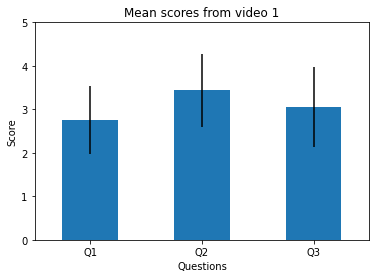

In [ ]:
analysis(33, 36, 1)

#### Analysis of video 2
The questions for video 2 is in coloumn 30, 31 and 32

['How satisfied are you with the quality of the silhouette extraction?.8', 'Did you notice any artefacts with the silhouette extraction?.8', 'Do you think the artefacts were annoying?.8']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.8,2.592593,51.851852,0.789519
Did you notice any artefacts with the silhouette extraction?.8,3.574074,71.481481,0.716434
Do you think the artefacts were annoying?.8,2.981481,59.629630,0.835323


True

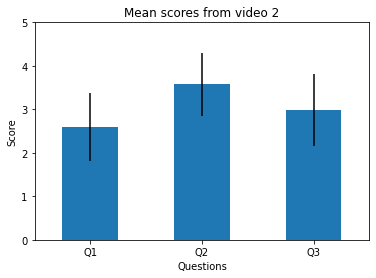

In [ ]:
analysis(30, 33, 2)

#### Analysis of video 3
The questions for video 3 is in coloumn 12, 13 and 14

['How satisfied are you with the quality of the silhouette extraction?.2', 'Did you notice any artefacts with the silhouette extraction?.2', 'Do you think the artefacts were annoying?.2']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.2,2.870370,57.407407,0.847778
Did you notice any artefacts with the silhouette extraction?.2,3.407407,68.148148,0.921822
Do you think the artefacts were annoying?.2,2.925926,58.518519,0.928619


True

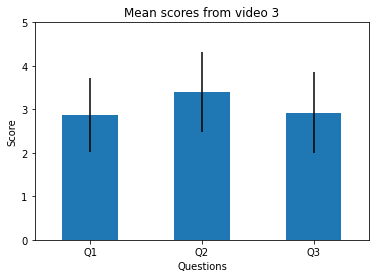

In [ ]:
analysis(12, 15, 3)

#### Analysis of video 4
The questions for video 4 is in coloumn 24, 25 and 26

['How satisfied are you with the quality of the silhouette extraction?.6', 'Did you notice any artefacts with the silhouette extraction?.6', 'Do you think the artefacts were annoying?.6']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.6,1.685185,33.703704,0.796788
Did you notice any artefacts with the silhouette extraction?.6,4.444444,88.888889,0.743948
Do you think the artefacts were annoying?.6,3.981481,79.629630,0.980773


True

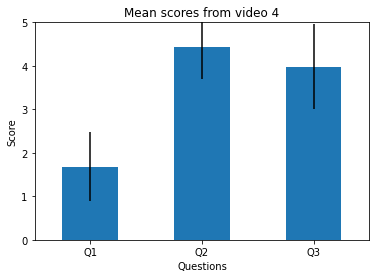

In [ ]:
analysis(24, 27, 4)

#### Analysis of video 5
The questions for video 5 is in coloumn 21, 22 and 23

['How satisfied are you with the quality of the silhouette extraction?.5', 'Did you notice any artefacts with the silhouette extraction?.5', 'Do you think the artefacts were annoying?.5']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.5,1.685185,33.703704,0.772745
Did you notice any artefacts with the silhouette extraction?.5,4.574074,91.481481,0.569735
Do you think the artefacts were annoying?.5,4.113208,82.264151,0.776094


True

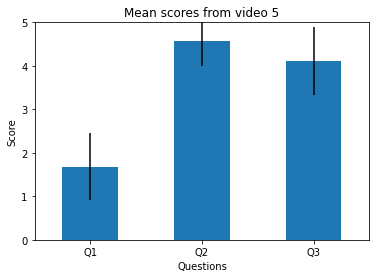

In [ ]:
analysis(21, 24, 5)

#### Analysis of video 6
The questions for video 6 is in coloumn 9, 10 and 11

['How satisfied are you with the quality of the silhouette extraction?.1', 'Did you notice any artefacts with the silhouette extraction?.1', 'Do you think the artefacts were annoying?.1']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.1,3.814815,76.296296,0.778825
Did you notice any artefacts with the silhouette extraction?.1,2.314815,46.296296,0.842818
Do you think the artefacts were annoying?.1,1.796296,35.925926,0.855165


True

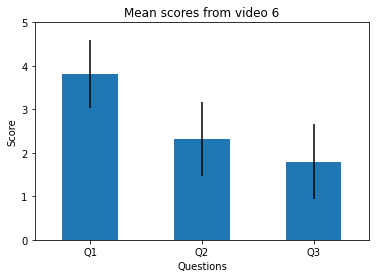

In [ ]:
analysis(9, 12, 6)

#### Analysis of video 7
The questions for video 7 is in coloumn 6, 7 and 8

['How satisfied are you with the quality of the silhouette extraction?', 'Did you notice any artefacts with the silhouette extraction?', 'Do you think the artefacts were annoying?']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?,2.592593,51.851852,0.858224
Did you notice any artefacts with the silhouette extraction?,3.851852,77.037037,0.939840
Do you think the artefacts were annoying?,3.185185,63.703704,0.912680


True

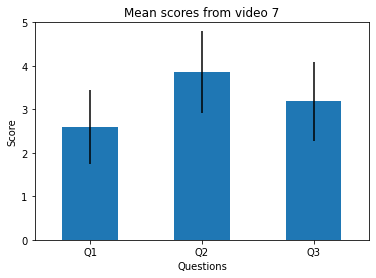

In [ ]:
analysis(6, 9, 7) # Video 1

#### Analysis of video 8
The questions for video 8 is in coloumn 39, 40 and 41

['How satisfied are you with the quality of the silhouette extraction?.11', 'Did you notice any artefacts with the silhouette extraction?.11', 'Do you think the artefacts were annoying?.11']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.11,2.500000,50.000000,0.841158
Did you notice any artefacts with the silhouette extraction?.11,3.833333,76.666667,0.746059
Do you think the artefacts were annoying?.11,3.314815,66.296296,0.948168


True

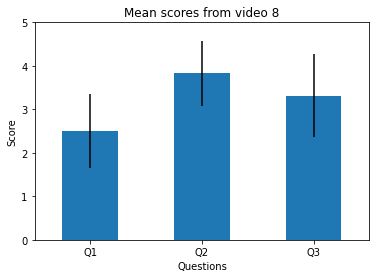

In [ ]:
analysis(39, 42, 8)

#### Analysis of video 9
The questions for video 9 is in coloumn 27, 28 and 29

['How satisfied are you with the quality of the silhouette extraction?.7', 'Did you notice any artefacts with the silhouette extraction?.7', 'Do you think the artefacts were annoying?.7']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.7,3.907407,78.148148,0.807244
Did you notice any artefacts with the silhouette extraction?.7,2.018519,40.370370,0.788855
Do you think the artefacts were annoying?.7,1.481481,29.629630,0.794812


True

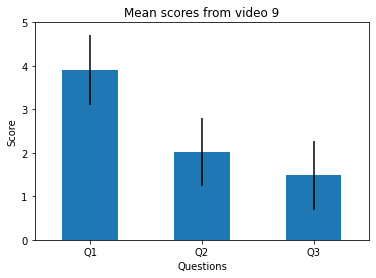

In [ ]:
analysis(27, 30, 9)

#### Analysis of video 10
The questions for video 10 is in coloumn 15, 16 and 17

['How satisfied are you with the quality of the silhouette extraction?.3', 'Did you notice any artefacts with the silhouette extraction?.3', 'Do you think the artefacts were annoying?.3']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.3,1.759259,35.185185,0.698656
Did you notice any artefacts with the silhouette extraction?.3,4.444444,88.888889,0.718139
Do you think the artefacts were annoying?.3,3.962963,79.259259,0.776129


True

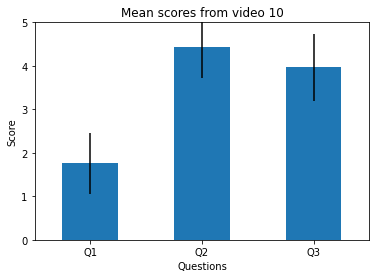

In [ ]:
analysis(15, 18, 10)

#### Analysis of video 11
The questions for video 11 is in coloumn 36, 37 and 38

['How satisfied are you with the quality of the silhouette extraction?.10', 'Did you notice any artefacts with the silhouette extraction?.10', 'Do you think the artefacts were annoying?.10']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.10,2.370370,47.407407,0.830919
Did you notice any artefacts with the silhouette extraction?.10,3.685185,73.703704,0.796788
Do you think the artefacts were annoying?.10,3.351852,67.037037,0.893528


True

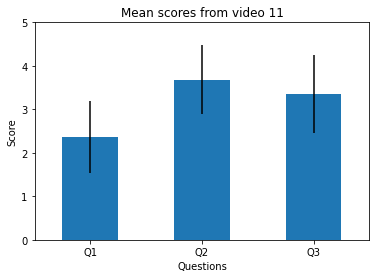

In [ ]:
analysis(36, 39, 11)

#### Analysis of video 12
The questions for video 12 is in coloumn 18, 19 and 20

['How satisfied are you with the quality of the silhouette extraction?.4', 'Did you notice any artefacts with the silhouette extraction?.4', 'Do you think the artefacts were annoying?.4']


,Mean,Percentage of 5,Standard Deviation
How satisfied are you with the quality of the silhouette extraction?.4,4.685185,93.703704,0.507457
Did you notice any artefacts with the silhouette extraction?.4,1.240741,24.814815,0.580669
Do you think the artefacts were annoying?.4,1.074074,21.481481,0.328050


True

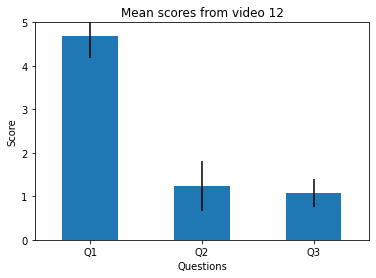

In [ ]:
analysis(18, 21, 12)

### Comparison of videos

We want to plot each question for each of the videos to easily see which videos got the best score

In [ ]:
def plot_questions(question):
  
  if question == 'How satisfied are you with the quality of the silhouette extraction?':
    question_number = '1'
  if question == 'Did you notice any artefacts with the silhouette extraction?':
    question_number = '2'
  if question == 'Do you think the artefacts were annoying?':
    question_number = '3'

  xlabels = []

  for i in range(1, 12+1):
    xlabels.append(str(i))
  
  Q = df_arranged.filter(regex=question).mean()

  display(Q)
  plt = Q.plot(kind="bar", legend=False)

  plt.set_title("Mean scores of question " + str(question_number) + " on all videos")
  plt.set_xlabel("Video number")
  plt.set_ylabel("Score")
  plt.set_ylim(0, 5)
  plt.set_xticklabels( xlabels, rotation=0 )

  plot = plt.figure
  plot.savefig('rating/question_' + str(question_number) + '.pdf')
  
  plot.show()
  return True



#### Mean score of question 1
'How satisfied are you with the quality of the silhouette extraction?'

How satisfied are you with the quality of the silhouette extraction?.9     2.759259
How satisfied are you with the quality of the silhouette extraction?.8     2.592593
How satisfied are you with the quality of the silhouette extraction?.2     2.870370
How satisfied are you with the quality of the silhouette extraction?.6     1.685185
How satisfied are you with the quality of the silhouette extraction?.5     1.685185
How satisfied are you with the quality of the silhouette extraction?.1     3.814815
How satisfied are you with the quality of the silhouette extraction?       2.592593
How satisfied are you with the quality of the silhouette extraction?.11    2.500000
How satisfied are you with the quality of the silhouette extraction?.7     3.907407
How satisfied are you with the quality of the silhouette extraction?.3     1.759259
How satisfied are you with the quality of the silhouette extraction?.10    2.370370
How satisfied are you with the quality of the silhouette extraction?.4     4

True

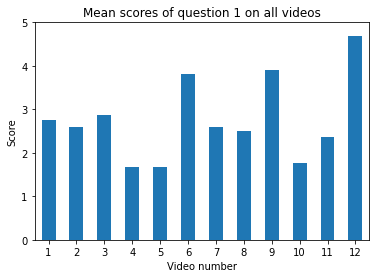

In [ ]:
plot_questions('How satisfied are you with the quality of the silhouette extraction?')


#### Mean score of quesiton 2 
'Did you notice any artefacts with the silhouette extraction?'

Did you notice any artefacts with the silhouette extraction?.9     3.444444
Did you notice any artefacts with the silhouette extraction?.8     3.574074
Did you notice any artefacts with the silhouette extraction?.2     3.407407
Did you notice any artefacts with the silhouette extraction?.6     4.444444
Did you notice any artefacts with the silhouette extraction?.5     4.574074
Did you notice any artefacts with the silhouette extraction?.1     2.314815
Did you notice any artefacts with the silhouette extraction?       3.851852
Did you notice any artefacts with the silhouette extraction?.11    3.833333
Did you notice any artefacts with the silhouette extraction?.7     2.018519
Did you notice any artefacts with the silhouette extraction?.3     4.444444
Did you notice any artefacts with the silhouette extraction?.10    3.685185
Did you notice any artefacts with the silhouette extraction?.4     1.240741
dtype: float64

True

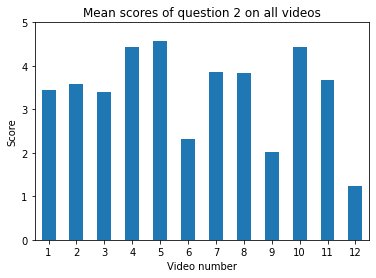

In [ ]:
plot_questions('Did you notice any artefacts with the silhouette extraction?')

#### Mean score of question 3
'Do you think the artefacts were annoying?'

Do you think the artefacts were annoying?.9     3.055556
Do you think the artefacts were annoying?.8     2.981481
Do you think the artefacts were annoying?.2     2.925926
Do you think the artefacts were annoying?.6     3.981481
Do you think the artefacts were annoying?.5     4.113208
Do you think the artefacts were annoying?.1     1.796296
Do you think the artefacts were annoying?       3.185185
Do you think the artefacts were annoying?.11    3.314815
Do you think the artefacts were annoying?.7     1.481481
Do you think the artefacts were annoying?.3     3.962963
Do you think the artefacts were annoying?.10    3.351852
Do you think the artefacts were annoying?.4     1.074074
dtype: float64

True

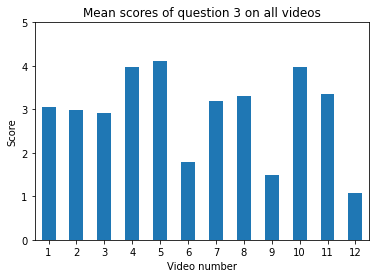

In [ ]:
plot_questions('Do you think the artefacts were annoying?') 

### Objective Measures


In [ ]:
df_objective = pd.read_csv('average_objective_stats.csv')
df_objective.head()

,video_number,IoU,DC,PA,TP,TN,FPN
0,1,0.935903,0.966676,0.992202,232890.245847,1.824539e+06,16170.830565
1,2,0.940968,0.969439,0.992814,234287.923588,1.824411e+06,14900.611296
2,3,0.950964,0.974862,0.994063,237918.983389,1.823370e+06,12310.750831
3,4,0.947189,0.972868,0.993536,240444.003322,1.819753e+06,13402.730897
4,5,0.948122,0.973362,0.993658,240427.262458,1.820023e+06,13150.106312


In [ ]:
def plot_objective(parameter):
  xlabels = []
  offset = 0.0025

  for i in range(1, 12+1):
    xlabels.append(str(i))
  
  param = df_objective[parameter]  
  max_value = param.max()
  min_value = param.min()

  display(param)
  plt = param.plot(kind="bar", legend=False)

  plt.set_title(str(parameter) + " scores")
  plt.set_xlabel("Video number")
  plt.set_ylabel("Score")
  plt.set_ylim(min_value-offset, max_value+offset)
  plt.set_xticklabels( xlabels, rotation=0 )

  plot = plt.figure
  plot.savefig('rating/' + str(parameter) + '.pdf')
  
  plot.show()
  return True

0     0.935903
1     0.940968
2     0.950964
3     0.947189
4     0.948122
5     0.942386
6     0.939088
7     0.947485
8     0.936874
9     0.939815
10    0.941655
11    0.938447
Name: IoU, dtype: float64

True

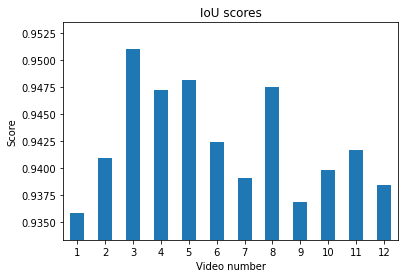

In [ ]:
plot_objective("IoU")


0     0.966676
1     0.969439
2     0.974862
3     0.972868
4     0.973362
5     0.970329
6     0.968551
7     0.973031
8     0.967404
9     0.968972
10    0.969947
11    0.968245
Name: DC, dtype: float64

True

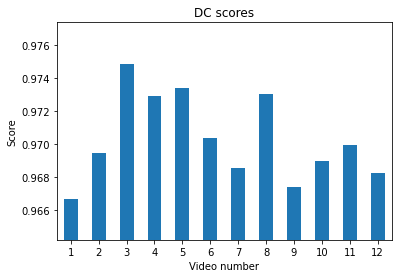

In [ ]:
plot_objective("DC")


0     0.992202
1     0.992814
2     0.994063
3     0.993536
4     0.993658
5     0.992917
6     0.992161
7     0.993323
8     0.991866
9     0.992404
10    0.992651
11    0.992205
Name: PA, dtype: float64

True

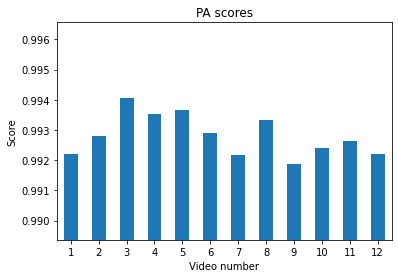

In [ ]:
plot_objective("PA")


In [ ]:
!zip -r rating.zip rating


  adding: rating/ (stored 0%)
  adding: rating/video_11.pdf (deflated 33%)
  adding: rating/DC.pdf (deflated 31%)
  adding: rating/video_2.pdf (deflated 33%)
  adding: rating/video_1.pdf (deflated 33%)
  adding: rating/video_4.pdf (deflated 33%)
  adding: rating/video_12.pdf (deflated 33%)
  adding: rating/video_8.pdf (deflated 32%)
  adding: rating/video_10.pdf (deflated 33%)
  adding: rating/question_3.pdf (deflated 31%)
  adding: rating/question_1.pdf (deflated 31%)
  adding: rating/IoU.pdf (deflated 31%)
  adding: rating/PA.pdf (deflated 31%)
  adding: rating/video_7.pdf (deflated 33%)
  adding: rating/video_5.pdf (deflated 33%)
  adding: rating/video_3.pdf (deflated 33%)
  adding: rating/video_9.pdf (deflated 32%)
  adding: rating/video_6.pdf (deflated 32%)
  adding: rating/question_2.pdf (deflated 31%)


## Correlation📊📈📉
Let's try to see if there is any statistical correlation between our objective and subjective measures.

As we know, we have a couple of hypotheses to support our research question: 

> $H_0$: There is __a__ correlation between the objective and subjective measures.

> $H_1$: There is __no__ correlation between the objective and subjective measures.

First we make some functions which let's us retrieve our data coloumns from our dataframes.

In [ ]:
def stats_questions(question):
  
  if question == 'How satisfied are you with the quality of the silhouette extraction?':
    question_number = '1'
  if question == 'Did you notice any artefacts with the silhouette extraction?':
    question_number = '2'
  if question == 'Do you think the artefacts were annoying?':
    question_number = '3'
  
  print(question)
  
  video_mean = df_arranged.filter(regex=question).mean()
  mean = video_mean.mean()

  return video_mean

stats_questions('How satisfied are you with the quality of the silhouette extraction?')

How satisfied are you with the quality of the silhouette extraction?


How satisfied are you with the quality of the silhouette extraction?.9     2.759259
How satisfied are you with the quality of the silhouette extraction?.8     2.592593
How satisfied are you with the quality of the silhouette extraction?.2     2.870370
How satisfied are you with the quality of the silhouette extraction?.6     1.685185
How satisfied are you with the quality of the silhouette extraction?.5     1.685185
How satisfied are you with the quality of the silhouette extraction?.1     3.814815
How satisfied are you with the quality of the silhouette extraction?       2.592593
How satisfied are you with the quality of the silhouette extraction?.11    2.500000
How satisfied are you with the quality of the silhouette extraction?.7     3.907407
How satisfied are you with the quality of the silhouette extraction?.3     1.759259
How satisfied are you with the quality of the silhouette extraction?.10    2.370370
How satisfied are you with the quality of the silhouette extraction?.4     4

In [ ]:
def stats_objective(parameter):
  xlabels = []
  
  param = df_objective[parameter]  
  
  display(parameter)
  
  return param

stats_objective("DC")

'DC'

0     0.966676
1     0.969439
2     0.974862
3     0.972868
4     0.973362
5     0.970329
6     0.968551
7     0.973031
8     0.967404
9     0.968972
10    0.969947
11    0.968245
Name: DC, dtype: float64

In [ ]:
stats_objective("IoU")

'IoU'

0     0.935903
1     0.940968
2     0.950964
3     0.947189
4     0.948122
5     0.942386
6     0.939088
7     0.947485
8     0.936874
9     0.939815
10    0.941655
11    0.938447
Name: IoU, dtype: float64

The following information has been learned from [How to Calculate Correlation Between Variables in Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/).

Thanks for the lovely information, [James Brownlee](https://machinelearningmastery.com/about/) 🥰

### Covariance
The average of the product between the values from each sample, where the values have been centered.

Gives a measure of whether the two variables change in the same direction. Magnitude of the results can be hard to interpret. 

In [ ]:

def covariance(subjective, objective):
  data1 = np.asarray(stats_questions(subjective), dtype=float)
  data2 = np.asarray(stats_objective(objective), dtype=float)

  display(data1)
  display(data2)

  covariance = np.cov(data1, data2)
  display(covariance)

covariance('Did you notice any artefacts with the silhouette extraction?', 'PA')

Did you notice any artefacts with the silhouette extraction?


'PA'

array([3.44444444, 3.57407407, 3.40740741, 4.44444444, 4.57407407,
       2.31481481, 3.85185185, 3.83333333, 2.01851852, 4.44444444,
       3.68518519, 1.24074074])

array([0.99220157, 0.99281413, 0.9940631 , 0.99353649, 0.99365832,
       0.99291667, 0.99216147, 0.99332349, 0.99186554, 0.99240394,
       0.99265069, 0.99220479])

array([[1.07401952e+00, 3.35750235e-04],
       [3.35750235e-04, 4.84687896e-07]])

In [ ]:
covariance('Did you notice any artefacts with the silhouette extraction?', 'IoU')

Did you notice any artefacts with the silhouette extraction?


'IoU'

array([3.44444444, 3.57407407, 3.40740741, 4.44444444, 4.57407407,
       2.31481481, 3.85185185, 3.83333333, 2.01851852, 4.44444444,
       3.68518519, 1.24074074])

array([0.93590271, 0.94096822, 0.95096421, 0.94718866, 0.94812151,
       0.94238559, 0.93908771, 0.9474851 , 0.93687389, 0.93981503,
       0.94165478, 0.9384474 ])

array([[1.07401952e+00, 2.29301490e-03],
       [2.29301490e-03, 2.39549751e-05]])

In [ ]:
data1 = [3.44444444, 3.57407407, 3.40740741, 4.44444444, 4.57407407]
data2 = [5555555555, 7777777777, 3333333333, 8888888888, 9999999999]
data3 = [0, 1, -1, 2, -1]

np.cov(data1, data3)

array([[0.32664609, 0.14814815],
       [0.14814815, 1.7       ]])

Since it is so hard to retreive more meaning from the covariance, we try to use some other measures.

### Pearson's Correlation
If we have a normally distributed dataset, we can use the Pearson's measure.

A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [ ]:
# calculate the Pearson's correlation between two variables
from scipy.stats import pearsonr

def pearsons(subjective, objective):
  # prepare data
  data1 = np.asarray(stats_questions(subjective), dtype=float)
  data2 = np.asarray(stats_objective(objective), dtype=float)
  
  # calculate Pearson's correlation
  corr, _ = pearsonr(data1, data2)
  
  print('Pearsons correlation: %.3f' % corr)

In [ ]:
pearsons('Did you notice any artefacts with the silhouette extraction?', 'IoU')

Did you notice any artefacts with the silhouette extraction?


'IoU'

Pearsons correlation: 0.452


In [ ]:
pearsons('Did you notice any artefacts with the silhouette extraction?', 'DC')

Did you notice any artefacts with the silhouette extraction?


'DC'

Pearsons correlation: 0.445


In [ ]:
pearsons('Did you notice any artefacts with the silhouette extraction?', 'PA')

Did you notice any artefacts with the silhouette extraction?


'PA'

Pearsons correlation: 0.465


In [ ]:
pearsons('How satisfied are you with the quality of the silhouette extraction?', 'PA')

How satisfied are you with the quality of the silhouette extraction?


'PA'

Pearsons correlation: -0.451


But since our data set is not normally distributed, we have to use something else.

### Spearman's Correlation
A correlation measure for variables which may be related by a nonlinear relationship, and being considered to not have a normally distributed distribution.

A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

In [ ]:
# calculate the Spearman's correlation between two variables
from scipy.stats import spearmanr

def spearman(subjective, objective):
  # prepare data
  data1 = np.asarray(stats_questions(subjective), dtype=float)
  data2 = np.asarray(stats_objective(objective), dtype=float)
  
  # calculate Pearson's correlation
  corr, _ = spearmanr(data1, data2)
  
  print('Spearmans correlation: %.3f' % corr)

  return corr

#### Question 1

In [ ]:
spearman('How satisfied are you with the quality of the silhouette extraction?', 'IoU')

How satisfied are you with the quality of the silhouette extraction?


'IoU'

Spearmans correlation: -0.456


-0.4561431587846275

In [ ]:
spearman('How satisfied are you with the quality of the silhouette extraction?', 'DC')

How satisfied are you with the quality of the silhouette extraction?


'DC'

Spearmans correlation: -0.456


-0.4561431587846275

In [ ]:
spearman('How satisfied are you with the quality of the silhouette extraction?', 'PA')

How satisfied are you with the quality of the silhouette extraction?


'PA'

Spearmans correlation: -0.435


-0.43509039760995244

All values are over -0.5.
This indicates little to no correlation.

#### Question 2

In [ ]:
spearman('Did you notice any artefacts with the silhouette extraction?', 'IoU')

Did you notice any artefacts with the silhouette extraction?


'IoU'

Spearmans correlation: 0.399


0.39930008695285735

In [ ]:
spearman('Did you notice any artefacts with the silhouette extraction?', 'DC')

Did you notice any artefacts with the silhouette extraction?


'DC'

Spearmans correlation: 0.399


0.39930008695285735

In [ ]:
spearman('Did you notice any artefacts with the silhouette extraction?', 'PA')

Did you notice any artefacts with the silhouette extraction?


'PA'

Spearmans correlation: 0.347


0.3467606018274814

All values are under 0.5.
This indicates little to no correlation.

#### Question 3

In [ ]:
spearman('Do you think the artefacts were annoying?', 'IoU')

Do you think the artefacts were annoying?


'IoU'

Spearmans correlation: 0.420


0.41958041958041964

In [ ]:
spearman('Do you think the artefacts were annoying?', 'DC')

Do you think the artefacts were annoying?


'DC'

Spearmans correlation: 0.420


0.41958041958041964

In [ ]:
spearman('Do you think the artefacts were annoying?', 'PA')

Do you think the artefacts were annoying?


'PA'

Spearmans correlation: 0.392


0.3916083916083916

All values are under 0.5.
This indicates little to no correlation.

### Significance test
Much of the following has been learned from [Everything you need to know about interpreting correlations](https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8)

As we want to know in general if there would be a correlation between the objective and subjective measures for the machine learning based foreground extractor, we can not simply draw our conclusions from our sampled Spearman's correlation tests. If we have used a different sample, in our case other videos, we would have gotten other Spearman's values. 

We want to draw the conclusion on the entire population, the model in general, and not just our samples, our created videos. 

To do this, we create a __statistical significance test__ using our previously formed hypotheses. The statistical significance test tells us if what we observe in the sample is expected to be true in the population. 

#### T-Test
Allows us to use sample data to generalize an assumption to an entire population.

$ t = \frac{r * \sqrt(n-2) }{\sqrt(1-r^2)} $, where 
> $r = sample\ correlation\ coefficient$
> $n = sample\ size$


Bigger t-value, more likely that the correlation is repeatable


In [ ]:
import math # To use math.sqrt()

In [ ]:
def t_test(r, n):
  t_test = (r * math.sqrt(n - 2))/math.sqrt(1-r*r)
  print("T-test: "+str(t_test))
  return t_test

In [ ]:
t_test(spearman('Do you think the artefacts were annoying?', 'PA'), 12)

Do you think the artefacts were annoying?


'PA'

Spearmans correlation: 0.392
T-test: 1.3458661258529039


1.3458661258529039

#### P-value

The probability that the $H_0$ is true. Our case: the probability that the correlation happend by chance or not.

A P-value of $0.05$, meaning a $5\%$ chance that the correlation happened by chance. We want this, so this gives us the significance level of $α = 0.05$

We find our corresponding t-value for our selected P-value by looking it up in a [t-table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf), but to find the t-value we need to know our number of degrees of freedom.
$ DF = n -2 $
With our sample size of $12$, we get a $DF = 10$

And finally we get our t-score: $t=1.8125$

In [ ]:
t = 1.8125



---


Let's make a final function which takes the sample correlation value and tells us if there is statistically significance.

In this case statstical significance __TRUE__, means that our sample data is representative for the entire population. 


In [ ]:
def significance(corr_value, sample_size, t_value):
  t_test_value = t_test(corr_value, sample_size)

  if t_test_value > t_value:
    significance = False
  elif t_test_value < t_value:
    significance = True

  print("Correlation: "+str(corr_value))
  print("Sample size: "+str(sample_size))
  print("T-value: "+str(t_value))
  print("-------------------------")
  print("Significance: "+str(significance))

  return significance, t_test_value



---



### Questions

#### Question 1

In [ ]:
significance(spearman('How satisfied are you with the quality of the silhouette extraction?', 'IoU'), 12, t)

How satisfied are you with the quality of the silhouette extraction?


'IoU'

Spearmans correlation: -0.456
T-test: -1.620902270768468
Correlation: -0.4561431587846275
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, -1.620902270768468)

In [ ]:
significance(spearman('How satisfied are you with the quality of the silhouette extraction?', 'DC'), 12, t)

How satisfied are you with the quality of the silhouette extraction?


'DC'

Spearmans correlation: -0.456
T-test: -1.620902270768468
Correlation: -0.4561431587846275
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, -1.620902270768468)

In [ ]:
significance(spearman('How satisfied are you with the quality of the silhouette extraction?', 'PA'), 12, t)

How satisfied are you with the quality of the silhouette extraction?


'PA'

Spearmans correlation: -0.435
T-test: -1.528095127121111
Correlation: -0.43509039760995244
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, -1.528095127121111)

#### Question 2

In [ ]:
significance(spearman('Did you notice any artefacts with the silhouette extraction?', 'IoU'), 12, t)

Did you notice any artefacts with the silhouette extraction?


'IoU'

Spearmans correlation: 0.399
T-test: 1.377257638326777
Correlation: 0.39930008695285735
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.377257638326777)

In [ ]:
significance(spearman('Did you notice any artefacts with the silhouette extraction?', 'DC'), 12, t)

Did you notice any artefacts with the silhouette extraction?


'DC'

Spearmans correlation: 0.399
T-test: 1.377257638326777
Correlation: 0.39930008695285735
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.377257638326777)

In [ ]:
significance(spearman('Did you notice any artefacts with the silhouette extraction?', 'PA'), 12, t)

Did you notice any artefacts with the silhouette extraction?


'PA'

Spearmans correlation: 0.347
T-test: 1.1690911192456053
Correlation: 0.3467606018274814
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.1690911192456053)

#### Question 3

In [ ]:
significance(spearman('Do you think the artefacts were annoying?', 'IoU'), 12, t)

Do you think the artefacts were annoying?


'IoU'

Spearmans correlation: 0.420
T-test: 1.461719986526158
Correlation: 0.41958041958041964
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.461719986526158)

In [ ]:
significance(spearman('Do you think the artefacts were annoying?', 'DC'), 12, t)

Do you think the artefacts were annoying?


'DC'

Spearmans correlation: 0.420
T-test: 1.461719986526158
Correlation: 0.41958041958041964
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.461719986526158)

In [ ]:
significance(spearman('Do you think the artefacts were annoying?', 'PA'), 12, t)

Do you think the artefacts were annoying?


'PA'

Spearmans correlation: 0.392
T-test: 1.3458661258529039
Correlation: 0.3916083916083916
Sample size: 12
T-value: 1.8125
-------------------------
Significance: True


(True, 1.3458661258529039)



---
### Conclusion  😃

All of our statistical significance tests resulted in __TRUE__, meaning that all of our sampled data testing, stastitically makes up for a good represention of an entire population.

___We can therefore conclude, that statistically, there is no correlation between the objective and subjective measures for the machine learning based foreground extractor.___